In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_style import set_journal_style
set_journal_style()

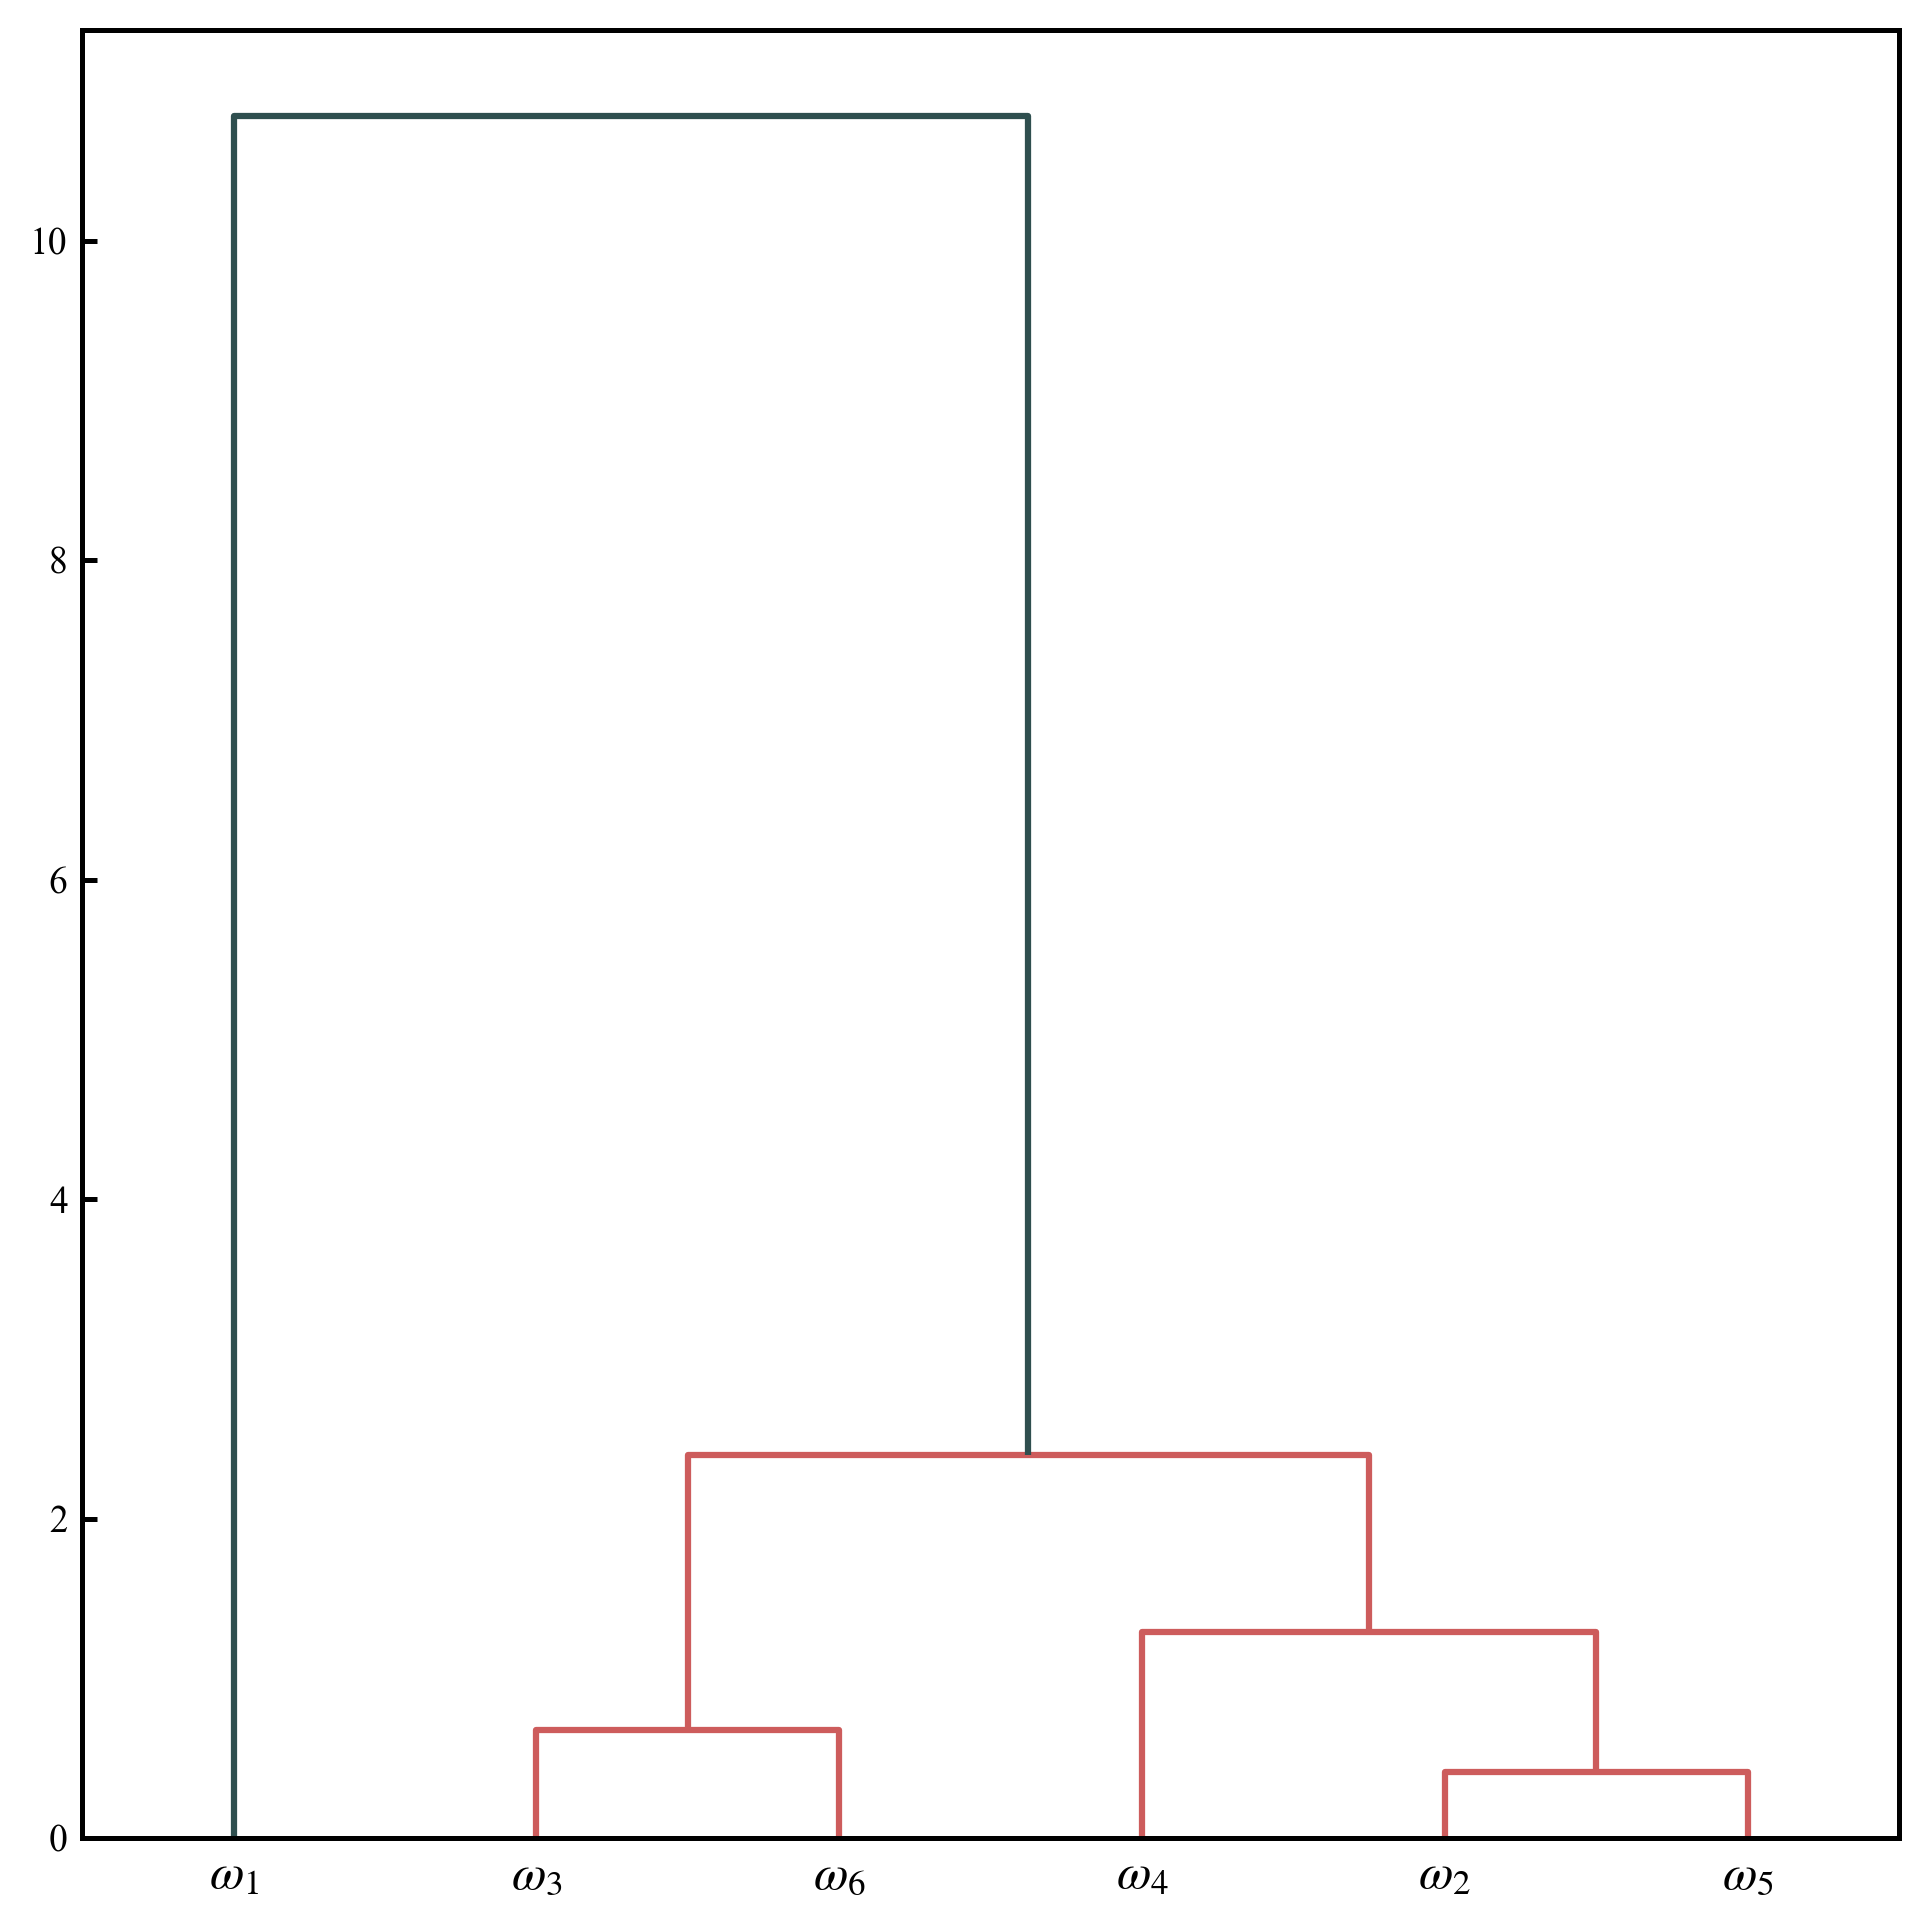

In [16]:
# 系统聚类
df = pd.read_csv('expenditure.CSV')
c = sch.linkage(df, method='complete', metric='seuclidean')
x_tick_labels = [f'$\omega_{i}$' for i in range(1, 7)]
sch.dendrogram(c, labels=x_tick_labels)
plt.show()

In [20]:
# 动态聚类
a = np.array([[2,3,3,5,7,9]]).T
md = KMeans(2).fit(a)

In [23]:
labels = md.labels_
centers = md.cluster_centers_

In [25]:
print(labels,'\n------\n',centers)

[0 0 0 0 1 1] 
------
 [[3.25]
 [8.  ]]


E:\Python\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


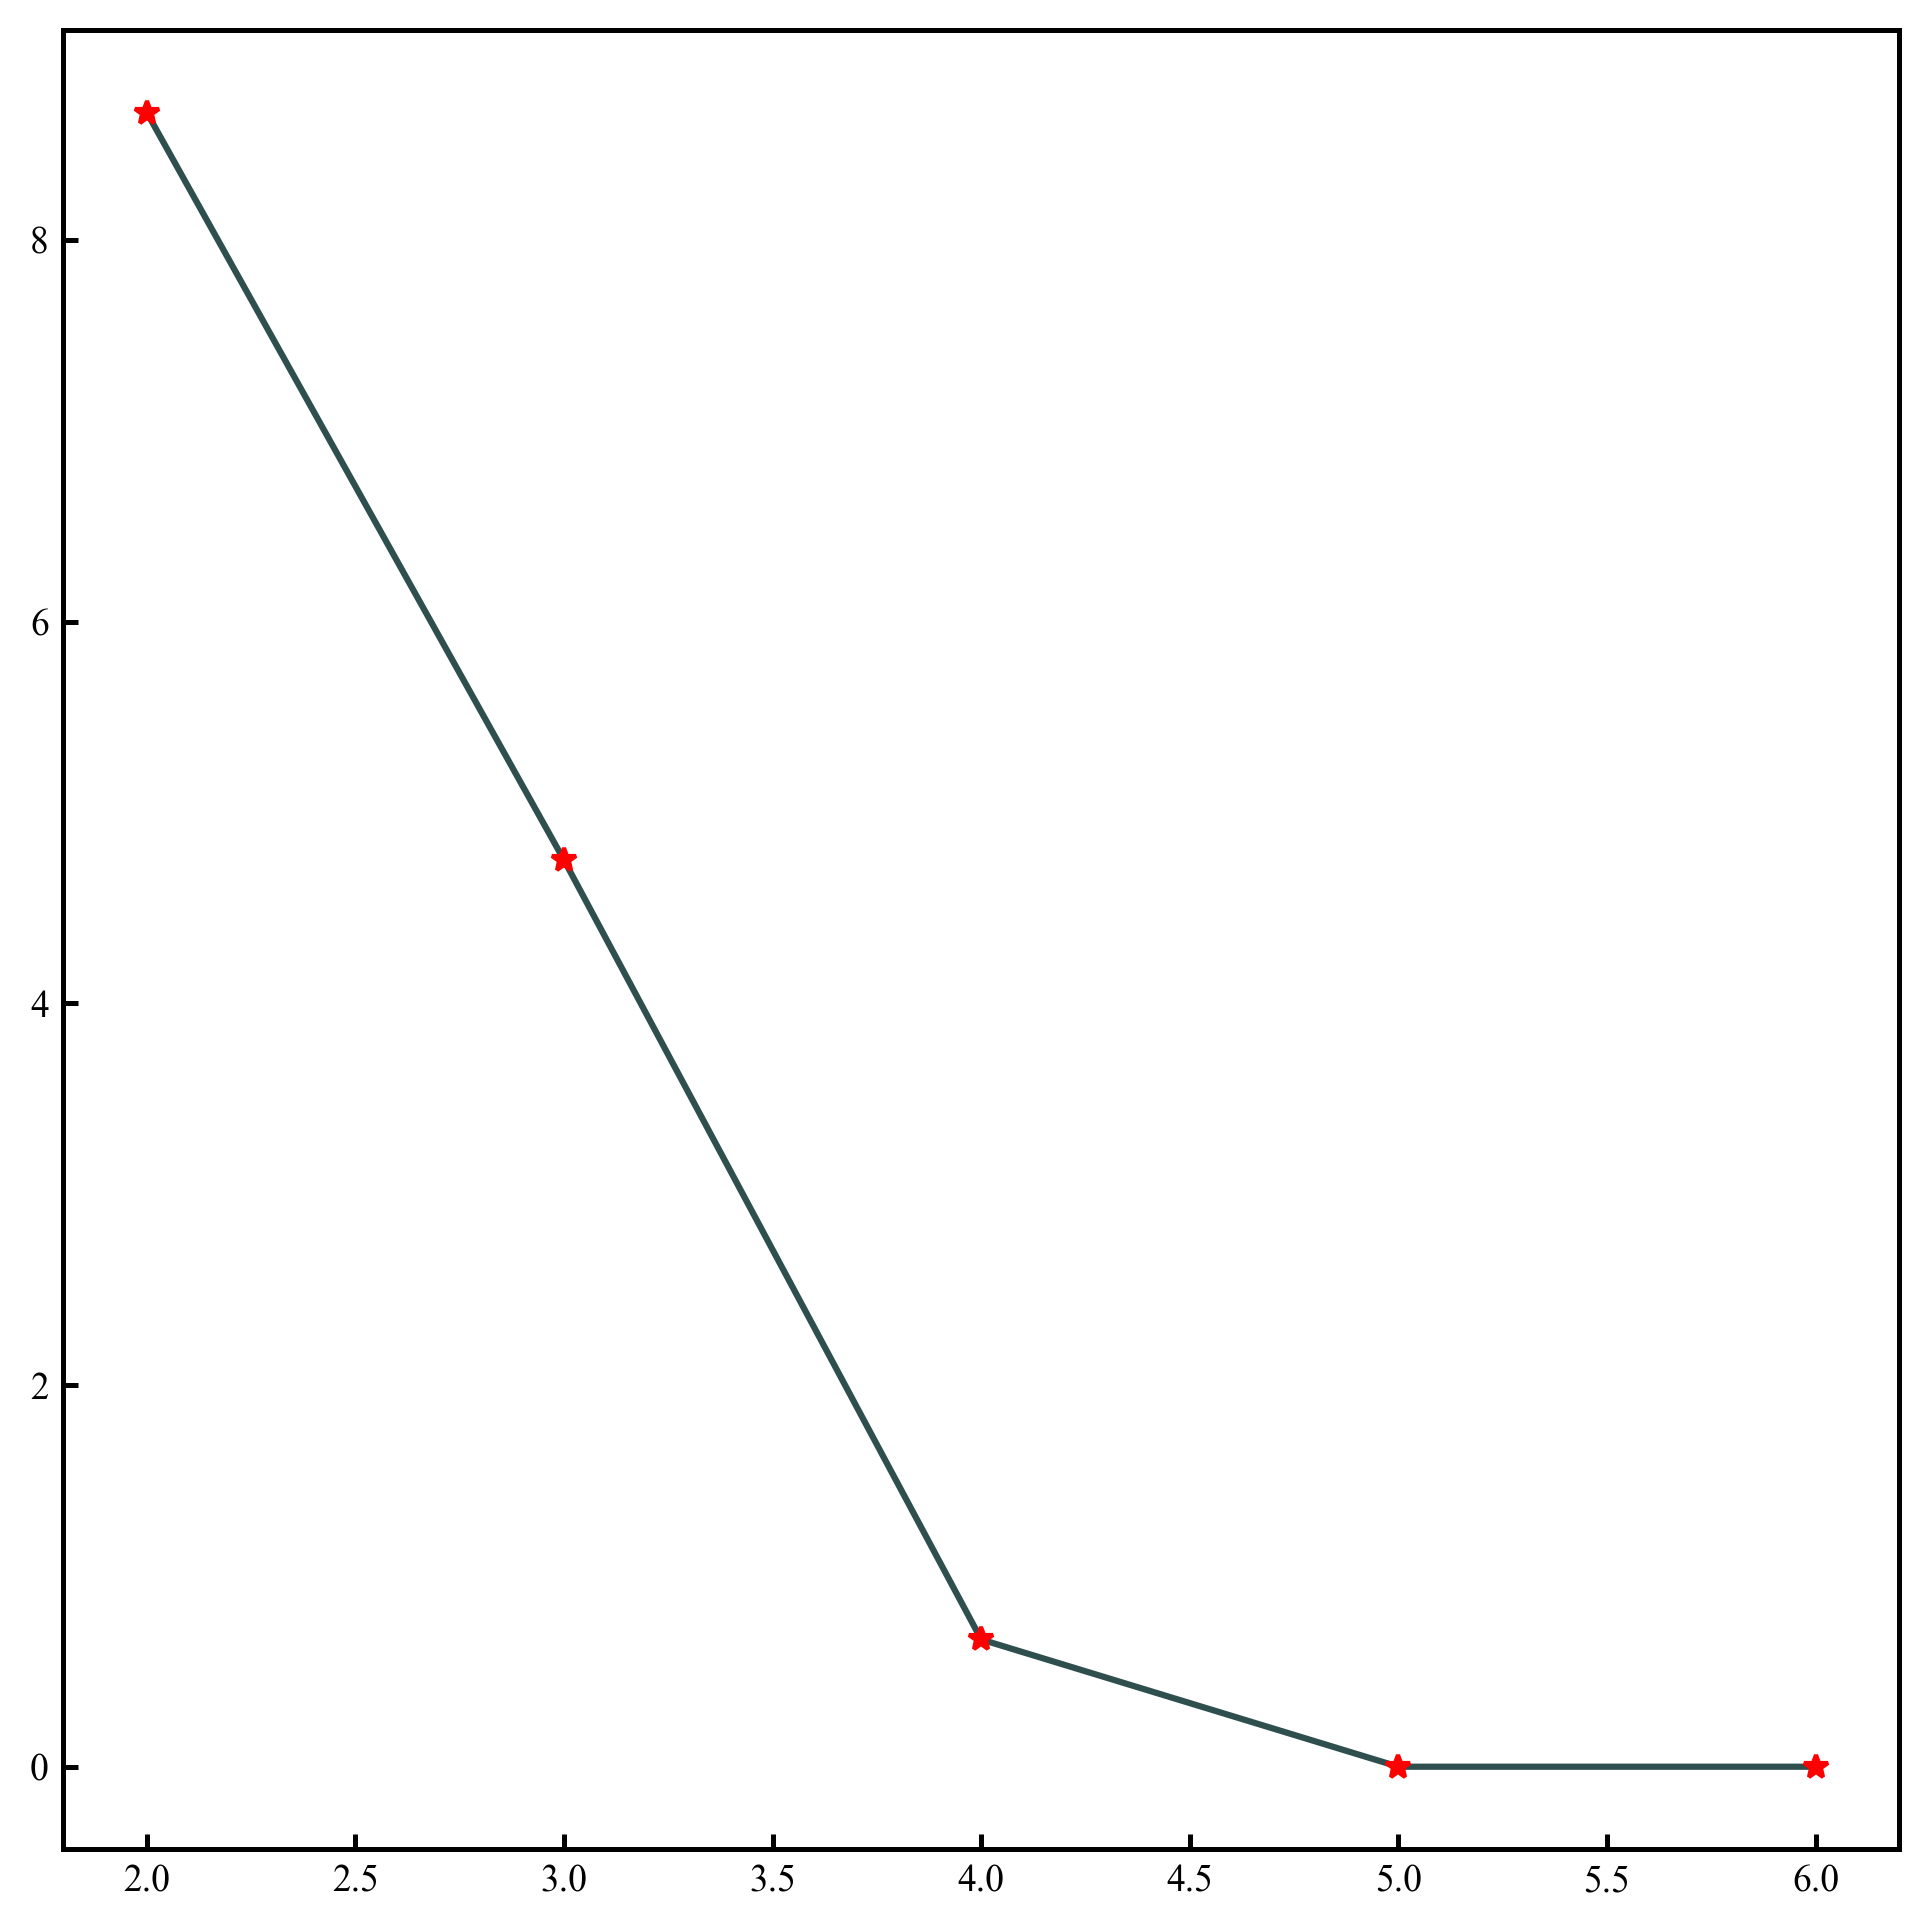

In [29]:
# 要分几类
SSE = []
K = range(2, len(a)+1)
for k in K:
    md = KMeans(k).fit(a)
    SSE.append(md.inertia_)
plt.plot(K, SSE, '-*', markerfacecolor='r', markeredgecolor='r')
plt.show()

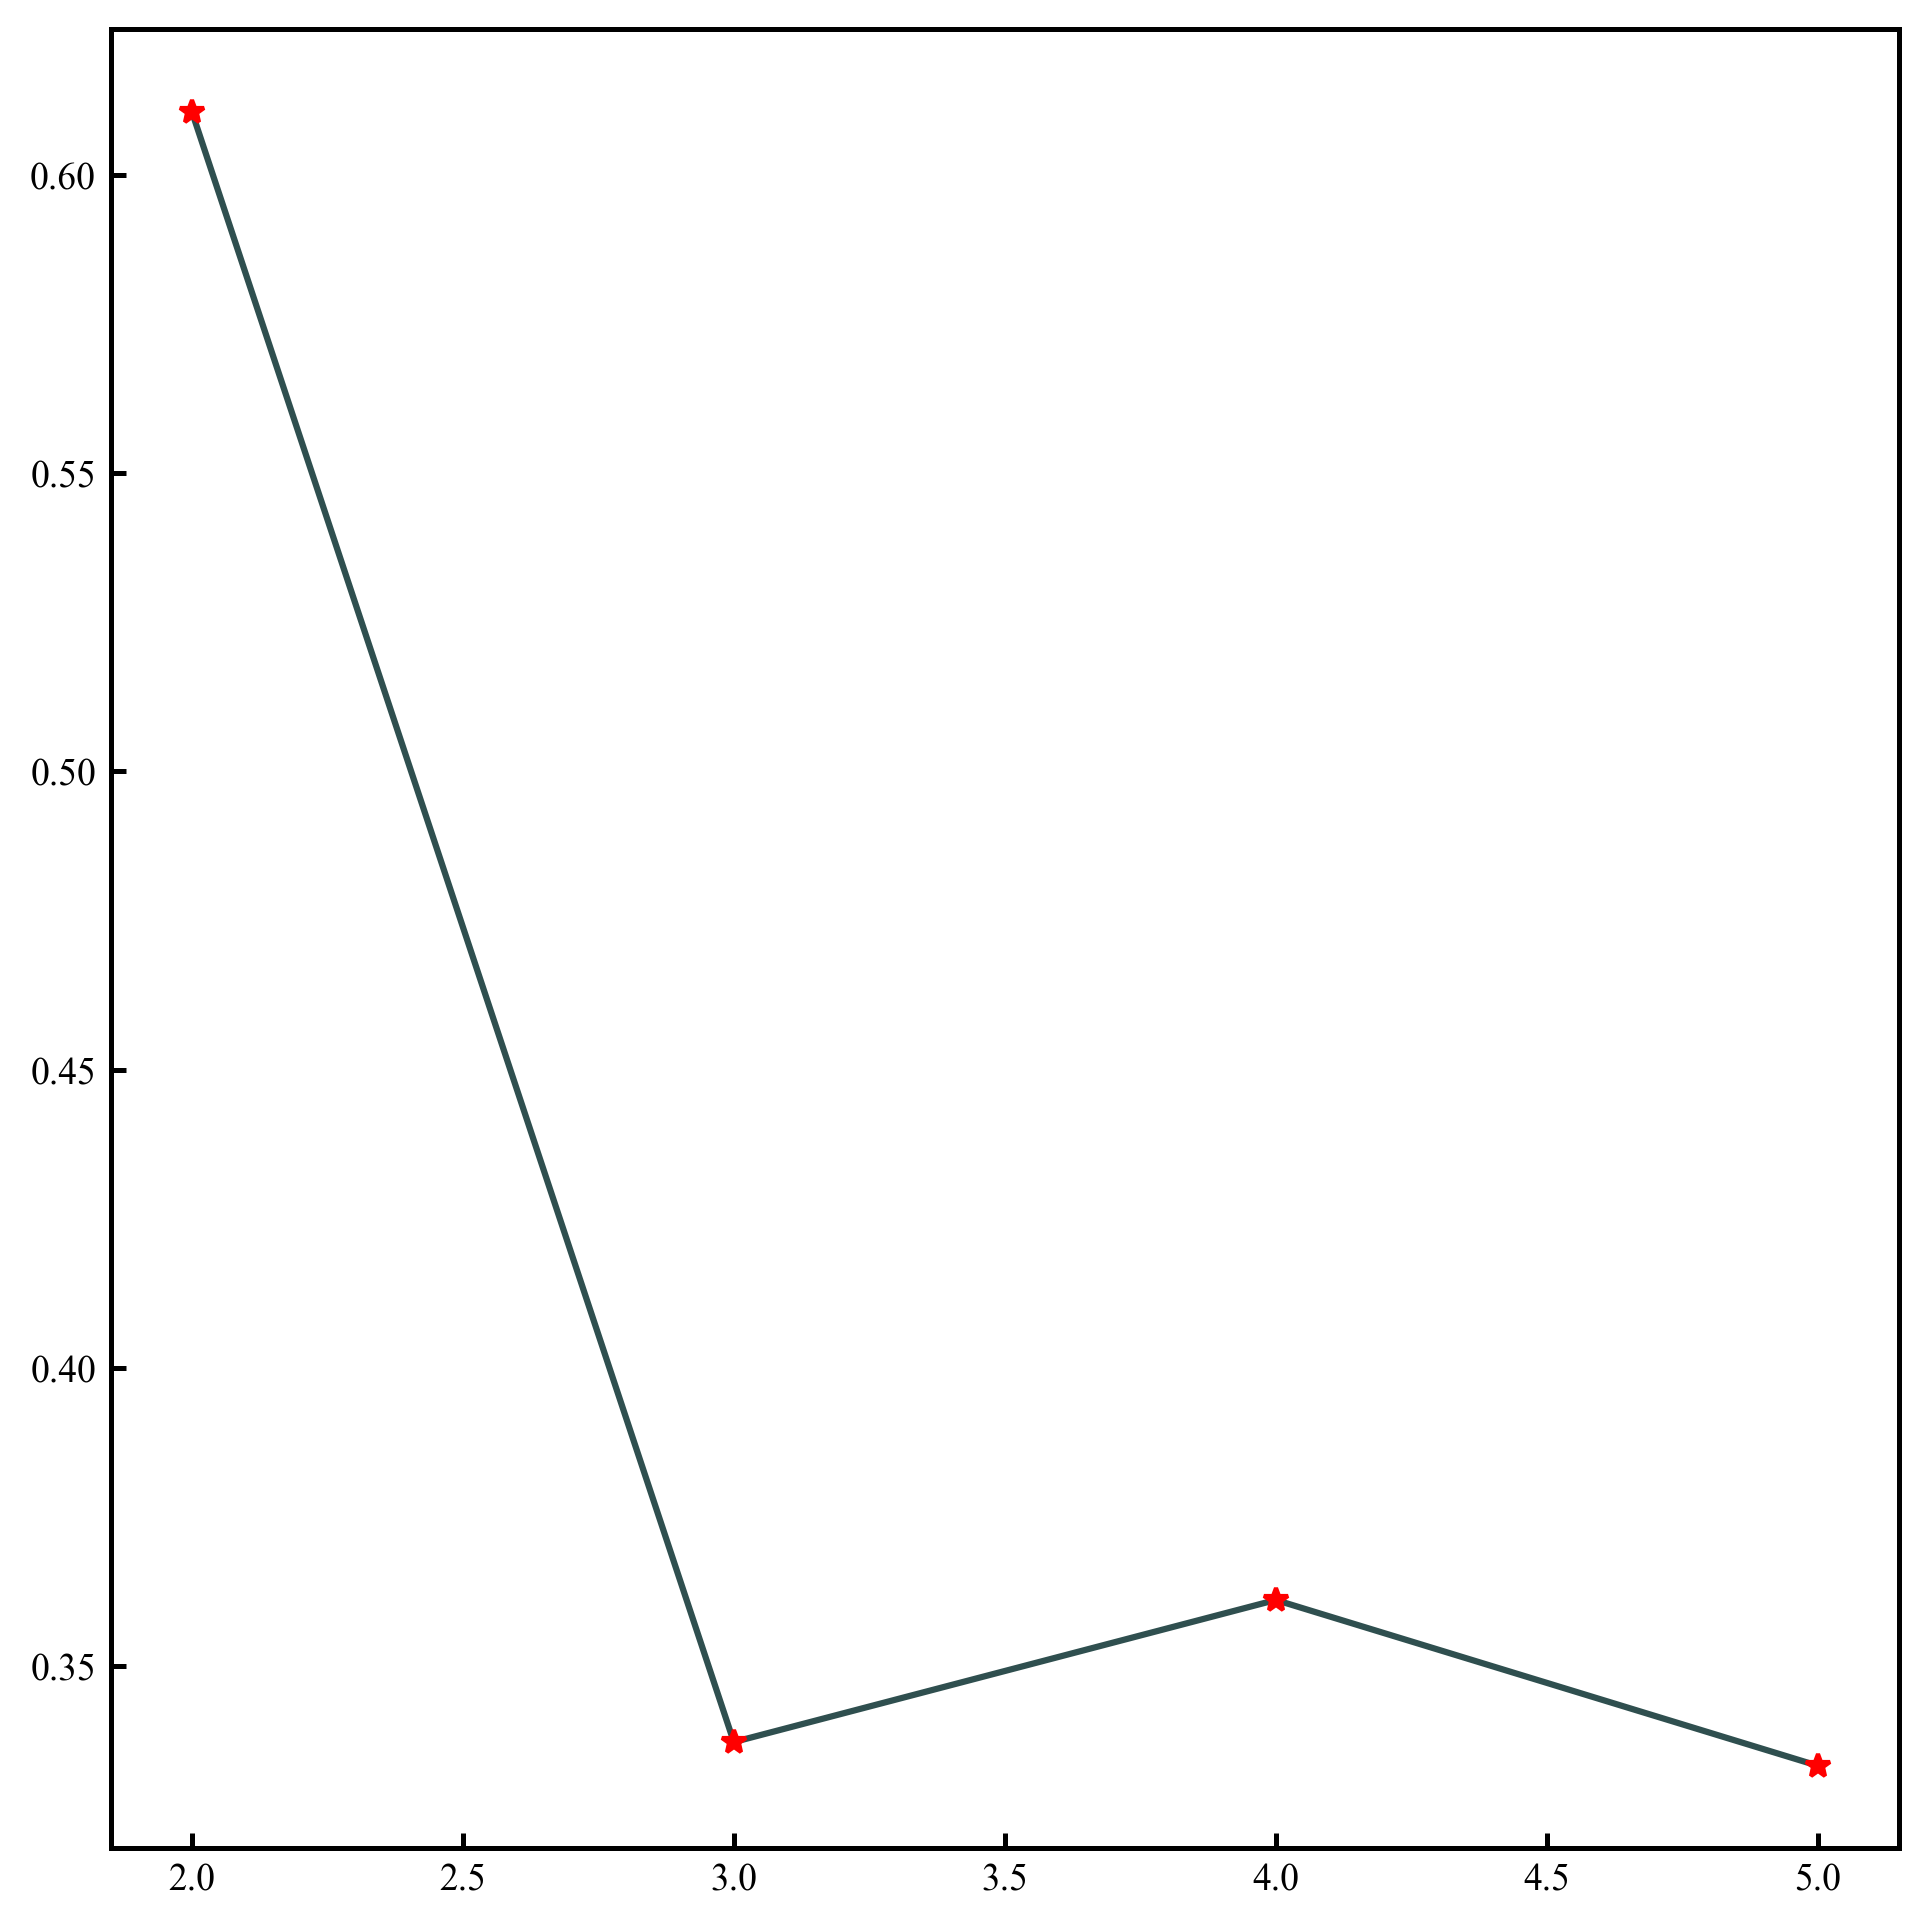

In [28]:
# 轮廓系数计算
from sklearn.metrics import silhouette_score

S = []
K = range(2, len(a))
for i in K:
    md = KMeans(i).fit(a)
    labels = md.labels_
    S.append(silhouette_score(a, labels))
plt.plot(K, S, '-*', markerfacecolor='r', markeredgecolor='r')
plt.show()

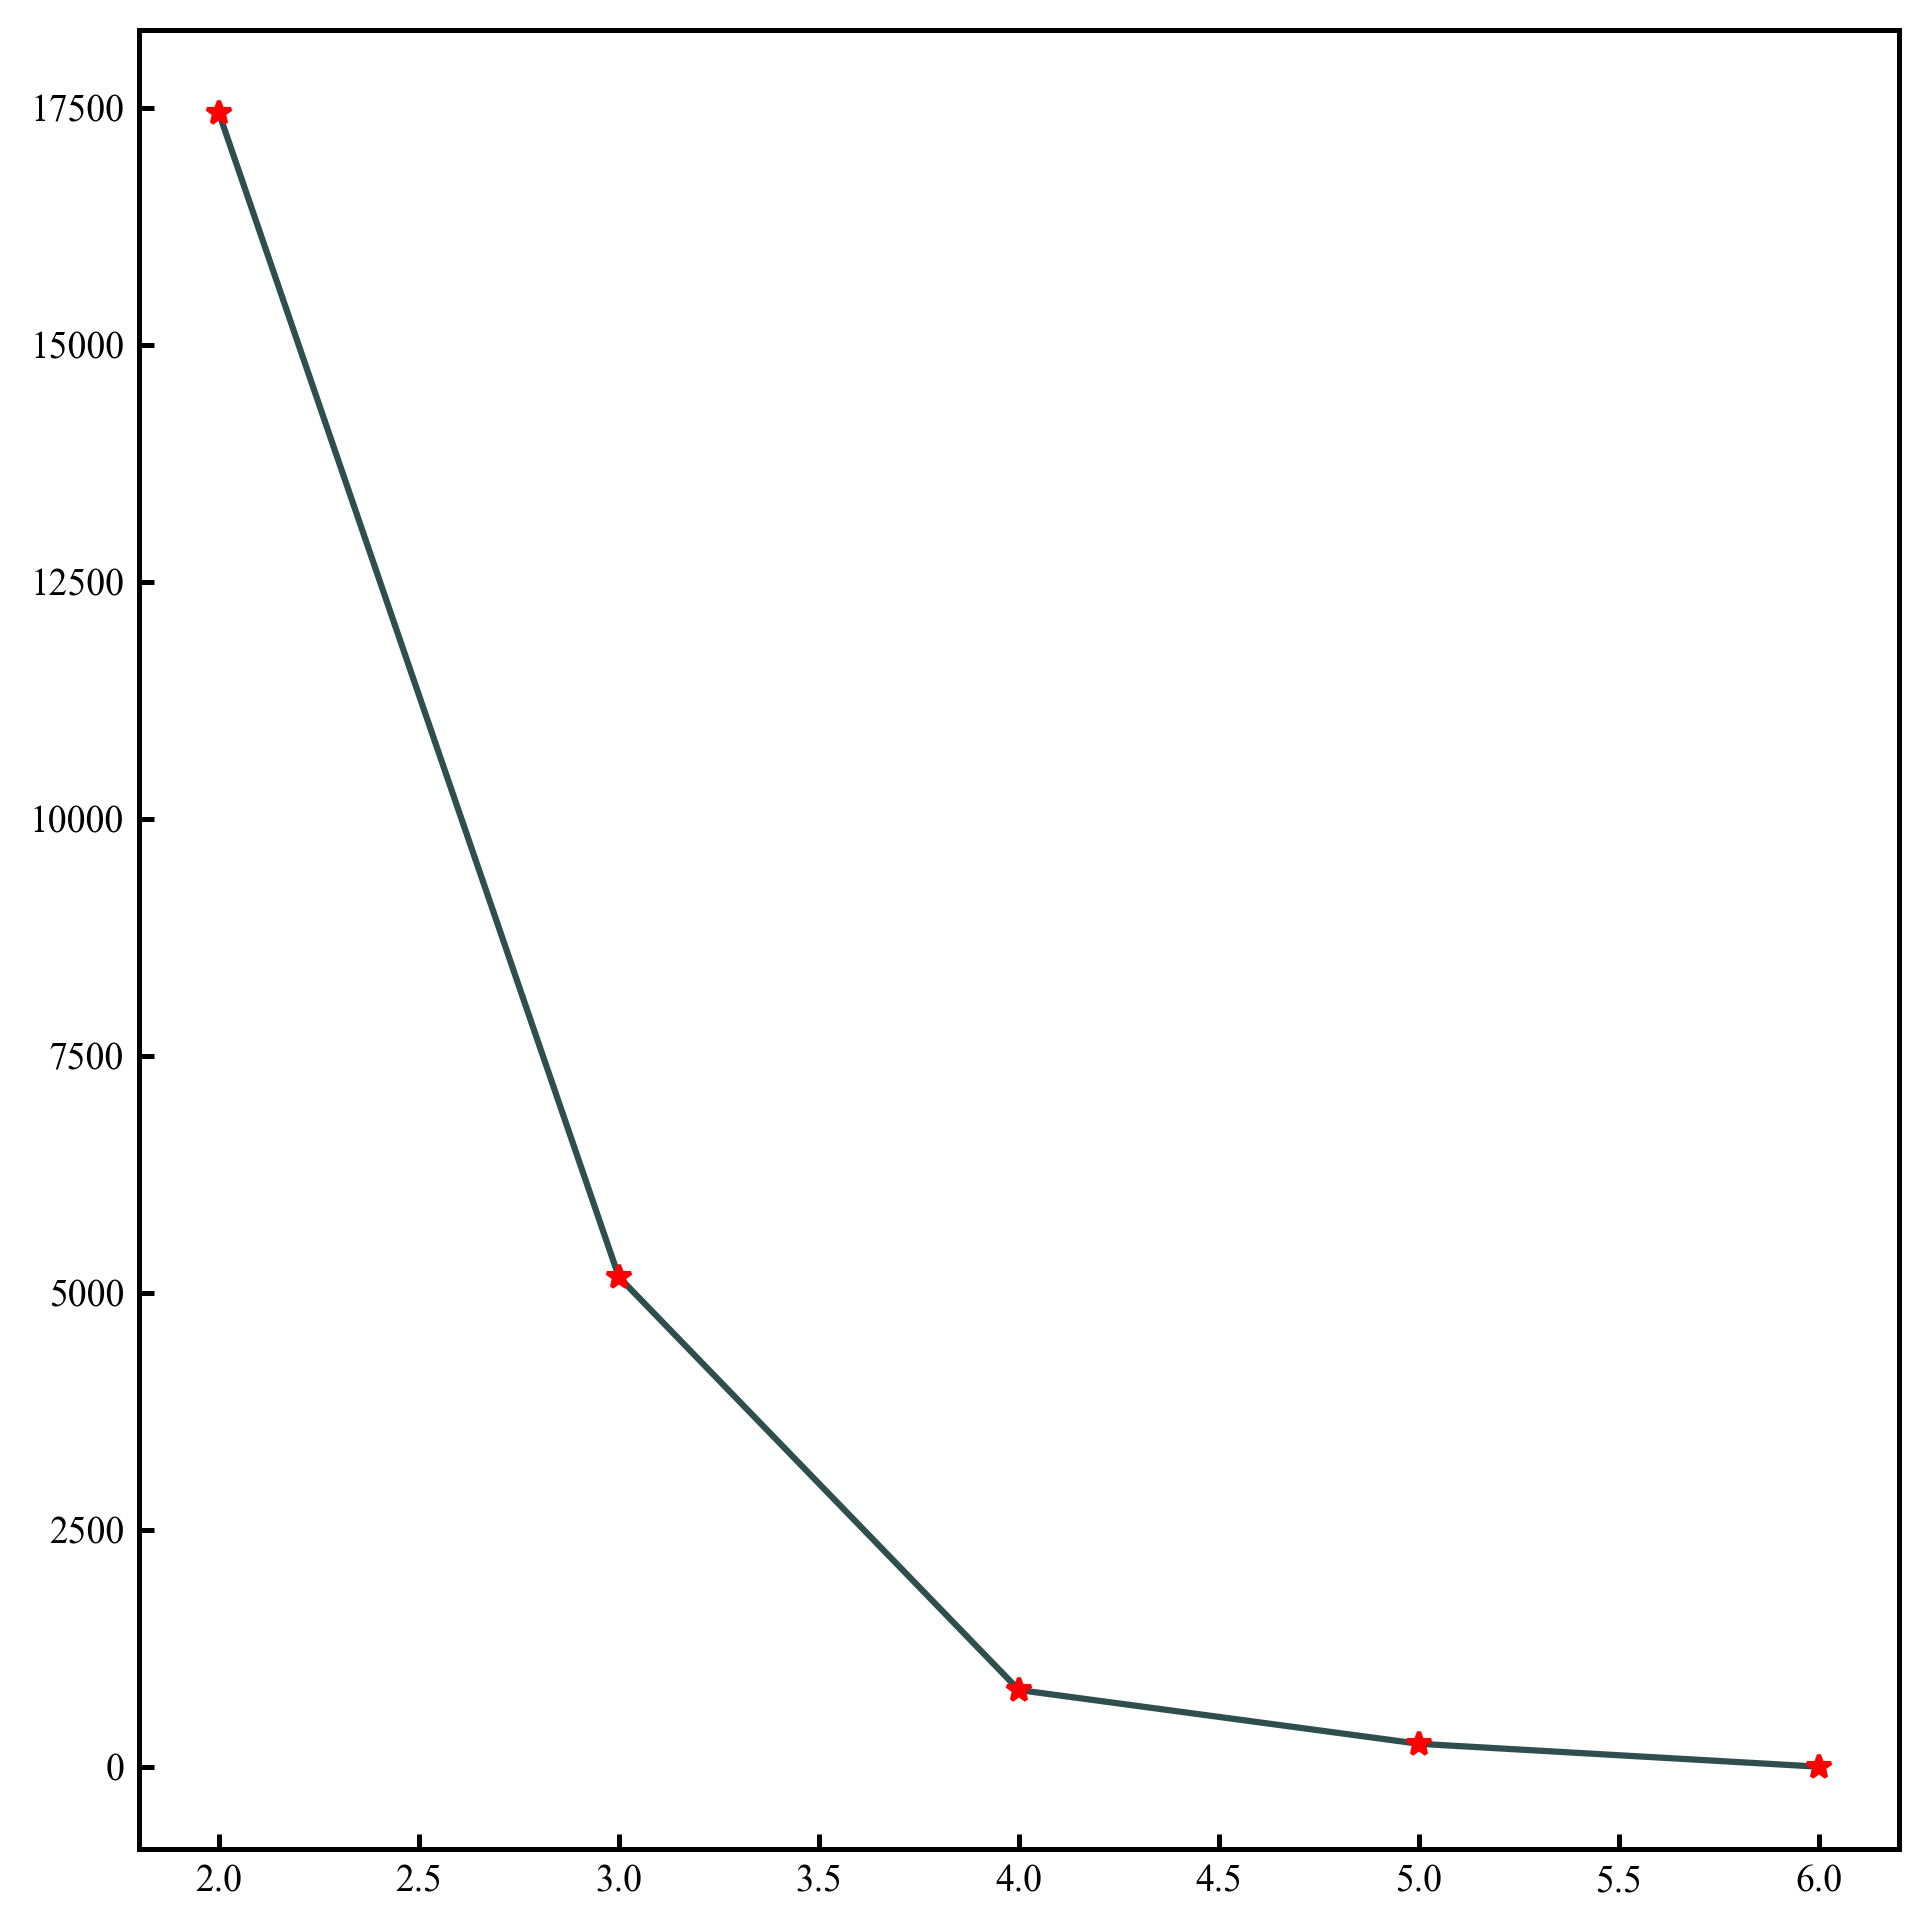

In [30]:
# 案例
SSE = []
K = range(2, len(df)+1)
for k in K:
    md = KMeans(k).fit(df)
    SSE.append(md.inertia_)
plt.plot(K, SSE, '-*', markerfacecolor='r', markeredgecolor='r')
plt.show()

In [31]:
md = KMeans(4).fit(df)
labels = md.labels_
centers = md.cluster_centers_

In [32]:
print(labels,'\n------\n',centers)

[1 2 0 3 2 0] 
------
 [[  9.385   7.205   6.05    4.825   6.105  10.63   11.795   9.64    9.21
    8.705   8.86   11.005  11.845  11.29    8.025   6.38 ]
 [190.33  135.2    95.21  104.78  128.41  145.68  159.37  116.22  221.11
  144.98  169.92  153.11  144.92  140.54  115.84  101.18 ]
 [ 46.39   36.445  22.82   21.64   25.81   35.96   29.335  25.66   44.73
   28.21   33.55   20.635  21.505  18.735  32.015  21.88 ]
 [ 60.54   44.16   22.44    9.89   12.58   27.29   11.81   13.76  115.65
   42.6    47.12   23.54   19.52   19.19   33.61   20.2  ]]
